In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('./train.csv')

data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [4]:
#Transpose The first 1000 for testing
data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255


#Transpose rest for testing
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape

In [5]:
Y_train

array([1, 8, 2, ..., 2, 0, 2], dtype=int64)

In [6]:
 #initializing the weights and biases
    
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [7]:
#Forwardpropogation

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

    

In [8]:
#Backpropogation

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    
    

In [9]:
#Calculations

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
            Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
            dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
            W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
            if i % 10 ==0:
                print("Iteration: ", i)
                predictions = get_predictions(A2)
                print(get_accuracy(predictions, Y))
    return W1,b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1, 500)

Iteration:  0
[6 5 0 ... 0 9 6] [1 8 2 ... 2 0 2]
0.13115254237288135
Iteration:  10
[1 3 2 ... 3 2 2] [1 8 2 ... 2 0 2]
0.40628813559322036
Iteration:  20
[1 3 3 ... 3 0 0] [1 8 2 ... 2 0 2]
0.49645762711864405
Iteration:  30
[1 8 1 ... 8 6 6] [1 8 2 ... 2 0 2]
0.601864406779661
Iteration:  40
[1 8 1 ... 8 6 6] [1 8 2 ... 2 0 2]
0.6593389830508475
Iteration:  50
[1 3 1 ... 8 6 6] [1 8 2 ... 2 0 2]
0.6985423728813559
Iteration:  60
[1 3 3 ... 3 6 2] [1 8 2 ... 2 0 2]
0.7297288135593221
Iteration:  70
[1 3 3 ... 8 6 2] [1 8 2 ... 2 0 2]
0.763728813559322
Iteration:  80
[1 3 3 ... 8 6 2] [1 8 2 ... 2 0 2]
0.789135593220339
Iteration:  90
[1 3 3 ... 8 0 2] [1 8 2 ... 2 0 2]
0.8128813559322033
Iteration:  100
[1 3 3 ... 8 2 2] [1 8 2 ... 2 0 2]
0.8166949152542373
Iteration:  110
[1 8 8 ... 8 2 2] [1 8 2 ... 2 0 2]
0.8279830508474576
Iteration:  120
[1 8 8 ... 8 2 2] [1 8 2 ... 2 0 2]
0.8158135593220339
Iteration:  130
[1 8 8 ... 8 2 2] [1 8 2 ... 2 0 2]
0.8514745762711864
Iteration:  140
[

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


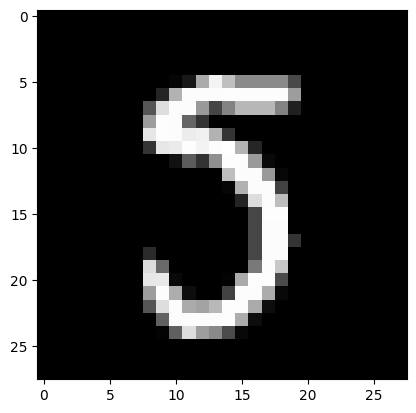

In [12]:
test_prediction(33, W1, b1, W2, b2)

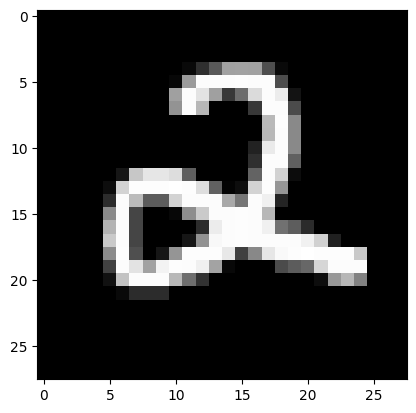

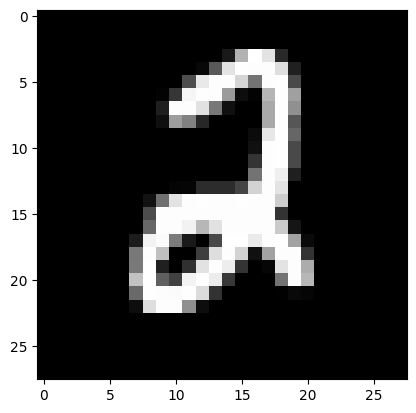

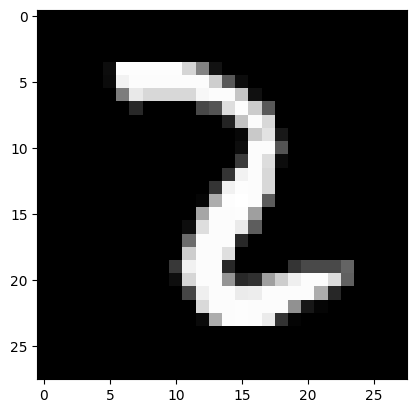

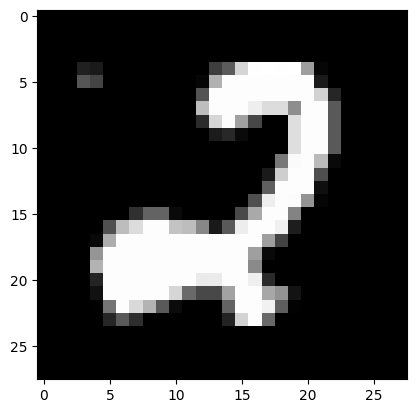

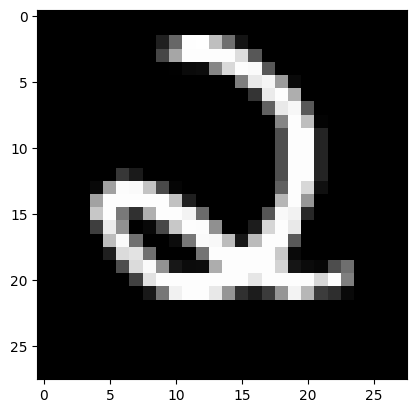

In [18]:
cnt=0
for i in range (1000):
    if(make_predictions(X_test[:, i, None], W1, b1, W2, b2)==2 and (cnt<5)):
        current_image = X_test[:, i, None]
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()
        cnt=cnt+1